In [ ]:
#importing libraries
# Standard data processing libraries
import pandas as pd
import numpy as np

# Libraries for NLP
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Libraries for visualization
import plotly.express as px
import plotly.io as pio

# Setting template for all plots
pio.templates.default = "simple_white"

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296178 sha256=72d6e80fff430cb513b1c365bd54a86ec31d102d3d2b5b4a6b7afbdf692a211a
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


# **Dataset**

In [ ]:
#loading the dataset
df_summer = pd.read_csv("output_summer.csv")
df_summer.head(20)

,year,title,artist,lyrics,rank
0,2021,Butter,BTS,"[Verse 1: Jung Kook, V & j-hope]\nSmooth like ...",1
1,2021,Good 4 U,Olivia Rodrigo,"[Intro]\n(Ah)\n\n[Verse 1]\nWell, good for you...",2
2,2021,Deja Vu,Olivia Rodrigo,[Verse 1]\nCar rides to Malibu\nStrawberry ice...,3
3,2021,Levitating,Dua Lipa,"[Verse 1]\nIf you wanna run away with me, I kn...",4
4,2021,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),"[Intro: Bruno Mars]\nSay baby, say baby, say b...",5
5,2021,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,[Chorus: Justin Bieber]\nI got my peaches out ...,6
6,2021,Save Your Tears,The Weeknd & Ariana Grande,[Intro: The Weeknd & Ariana Grande]\nOoh (Ooh)...,7
7,2021,Kiss Me More,Doja Cat Featuring SZA,"[Verse 1: Doja Cat]\nWe hug and, yes, we make ...",8
8,2021,Traitor,Olivia Rodrigo,[Intro]\nOoh-ooh-ooh\nAh-ah-ah-ah-ah\n\n[Verse...,9
9,2021,Astronaut In The Ocean,Masked Wolf,[Intro]\nAstronaut\n\n[Chorus]\nWhat you know ...,10


In [ ]:
df_winter = pd.read_csv("output_winter.csv")
df_winter.head(20)

,year,title,artist,lyrics,rank
0,2009,Single Ladies (Put A Ring On It),Beyonce,"[Produced by Beyoncé, The-Dream & Tricky Stewa...",1
1,2009,Live Your Life,T.I. Featuring Rihanna,"[Sample (over intro)]\nMiya hee, miya ho, miya...",2
2,2009,Just Dance,Lady Gaga Featuring Colby O'Donis,[Intro: Lady Gaga & Akon]\nTruth!\nRedOne\nKon...,3
3,2009,Heartless,Kanye West,"[Chorus]\nIn the night, I hear 'em talk\nThe c...",4
4,2009,Womanizer,Britney Spears,"[Verse 1]\nSuperstar, where you from? How's it...",5
5,2009,Hot N Cold,Katy Perry,[Verse 1]\nYou change your mind\nLike a girl c...,6
6,2009,Love Story,Taylor Swift,[Verse 1]\nWe were both young when I first saw...,7
7,2009,Love Lockdown,Kanye West,"[Verse 1]\nI'm not loving you, way I wanted to...",8
8,2009,Whatever You Like,T.I.,"[Intro]\nAye, Jim, you know the ol' sugar dadd...",9
9,2009,If I Were A Boy,Beyonce,[Verse 1]\nIf I were a boy\nEven just for a da...,10


# Preprocessing

In [ ]:
#checking null enteries
df_summer.info()
print("-------------")
df_winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    500 non-null    int64 
 1   title   500 non-null    object
 2   artist  500 non-null    object
 3   lyrics  471 non-null    object
 4   rank    500 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 19.7+ KB
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    2100 non-null   int64 
 1   title   2100 non-null   object
 2   artist  2100 non-null   object
 3   lyrics  2000 non-null   object
 4   rank    2100 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 82.2+ KB


In [ ]:
#removing null varibles---> no lyrics
df_summer = df_summer.dropna()
df_winter = df_winter.dropna()
df_summer.info()
print("-------------")
df_winter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    471 non-null    int64 
 1   title   471 non-null    object
 2   artist  471 non-null    object
 3   lyrics  471 non-null    object
 4   rank    471 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 22.1+ KB
-------------
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 2099
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    2000 non-null   int64 
 1   title   2000 non-null   object
 2   artist  2000 non-null   object
 3   lyrics  2000 non-null   object
 4   rank    2000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 93.8+ KB


In [ ]:
#Removing any repeated songs if available--> if title and artist is the same
df_summer = df_summer.drop_duplicates(subset=['title','artist'])
df_winter = df_winter.drop_duplicates(subset=['title', 'artist'])
df_summer.info()
print("-------------")
df_winter.info()


<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    470 non-null    int64 
 1   title   470 non-null    object
 2   artist  470 non-null    object
 3   lyrics  470 non-null    object
 4   rank    470 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 22.0+ KB
-------------
<class 'pandas.core.frame.DataFrame'>
Index: 1922 entries, 0 to 2099
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    1922 non-null   int64 
 1   title   1922 non-null   object
 2   artist  1922 non-null   object
 3   lyrics  1922 non-null   object
 4   rank    1922 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 90.1+ KB


Identifying the language of the song langdetect


In [ ]:
# Install langdetect if you haven't already
!pip install langdetect

from langdetect import detect

# Function to detect language using langdetect
def langdetect_language_predict(text):
    try:
        # Replace newlines and detect the language
        text = text.replace('\n', " ")
        return detect(text)  # Returns the language code
    except:
        return "unknown"  # Return "unknown" if detection fails

# Create a function to add language detection to a DataFrame
def add_language_column(df, lyrics_column='lyrics'):
    # Create a list to store detected languages
    language = []

    # Iterate over the lyrics in the DataFrame
    for lyrics in df[lyrics_column]:
        lang_code = langdetect_language_predict(lyrics)
        language.append(lang_code)

    # Add the detected languages to the DataFrame
    df.loc[:, 'language'] = language

# Process both DataFrames
add_language_column(df_summer, lyrics_column='lyrics')
add_language_column(df_winter, lyrics_column='lyrics')

# Display the language counts for both DataFrames
print("Summer DataFrame Language Counts:")
print(df_summer['language'].value_counts())

print("\nWinter DataFrame Language Counts:")
print(df_winter['language'].value_counts())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 41.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=1a7c4aa35d5e3b69c3b5bc5e7ab245694971ca5bc474547dd6f0614f4adbc641
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Summer DataFrame Language Counts:
language
en    457
es     11
ko      1
af      1
Name: count, dtype: int64

Winter DataFrame Language Counts:
language
en       1895
es         19
tr          1
so          1
it          1
sv          1
sk          1
cy          1
de          1
zh-cn       1
Name: count, dtype: int64


# **Extracting english songs**

In [ ]:
#processing with the english songs
df_summer_en = df_summer[df_summer['language'] == 'en']
df_summer_en.info()
df_summer_en.head(10)


<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      457 non-null    int64 
 1   title     457 non-null    object
 2   artist    457 non-null    object
 3   lyrics    457 non-null    object
 4   rank      457 non-null    int64 
 5   language  457 non-null    object
dtypes: int64(2), object(4)
memory usage: 25.0+ KB


,year,title,artist,lyrics,rank,language
0,2021,Butter,BTS,"[Verse 1: Jung Kook, V & j-hope]\nSmooth like ...",1,en
1,2021,Good 4 U,Olivia Rodrigo,"[Intro]\n(Ah)\n\n[Verse 1]\nWell, good for you...",2,en
2,2021,Deja Vu,Olivia Rodrigo,[Verse 1]\nCar rides to Malibu\nStrawberry ice...,3,en
3,2021,Levitating,Dua Lipa,"[Verse 1]\nIf you wanna run away with me, I kn...",4,en
4,2021,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),"[Intro: Bruno Mars]\nSay baby, say baby, say b...",5,en
5,2021,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,[Chorus: Justin Bieber]\nI got my peaches out ...,6,en
6,2021,Save Your Tears,The Weeknd & Ariana Grande,[Intro: The Weeknd & Ariana Grande]\nOoh (Ooh)...,7,en
7,2021,Kiss Me More,Doja Cat Featuring SZA,"[Verse 1: Doja Cat]\nWe hug and, yes, we make ...",8,en
8,2021,Traitor,Olivia Rodrigo,[Intro]\nOoh-ooh-ooh\nAh-ah-ah-ah-ah\n\n[Verse...,9,en
9,2021,Astronaut In The Ocean,Masked Wolf,[Intro]\nAstronaut\n\n[Chorus]\nWhat you know ...,10,en


In [ ]:
df_winter_en = df_winter[df_winter['language'] == 'en']
df_winter_en.info()
df_winter_en.head(10)


<class 'pandas.core.frame.DataFrame'>
Index: 1895 entries, 0 to 2099
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      1895 non-null   int64 
 1   title     1895 non-null   object
 2   artist    1895 non-null   object
 3   lyrics    1895 non-null   object
 4   rank      1895 non-null   int64 
 5   language  1895 non-null   object
dtypes: int64(2), object(4)
memory usage: 103.6+ KB


,year,title,artist,lyrics,rank,language
0,2009,Single Ladies (Put A Ring On It),Beyonce,"[Produced by Beyoncé, The-Dream & Tricky Stewa...",1,en
1,2009,Live Your Life,T.I. Featuring Rihanna,"[Sample (over intro)]\nMiya hee, miya ho, miya...",2,en
2,2009,Just Dance,Lady Gaga Featuring Colby O'Donis,[Intro: Lady Gaga & Akon]\nTruth!\nRedOne\nKon...,3,en
3,2009,Heartless,Kanye West,"[Chorus]\nIn the night, I hear 'em talk\nThe c...",4,en
4,2009,Womanizer,Britney Spears,"[Verse 1]\nSuperstar, where you from? How's it...",5,en
5,2009,Hot N Cold,Katy Perry,[Verse 1]\nYou change your mind\nLike a girl c...,6,en
6,2009,Love Story,Taylor Swift,[Verse 1]\nWe were both young when I first saw...,7,en
7,2009,Love Lockdown,Kanye West,"[Verse 1]\nI'm not loving you, way I wanted to...",8,en
8,2009,Whatever You Like,T.I.,"[Intro]\nAye, Jim, you know the ol' sugar dadd...",9,en
9,2009,If I Were A Boy,Beyonce,[Verse 1]\nIf I were a boy\nEven just for a da...,10,en


# **Cleaning Data**



In [ ]:
import re
import string

def text_cleansing_nltk(data):
    # Define a function to clean a single text entry
    def clean_text(text):
        # Remove brackets and their content
        text = re.sub(r'[\(\[].*?[\)\]]', '', text)
        # Replace new line breaks with spaces
        text = text.replace("\n", ' ')
        # Lowercase everything
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Replace multiple spaces with a single space
        text = re.sub(' +', ' ', text)
        return text

    # Apply the clean_text function to each entry in the data
    return data.apply(clean_text)

# Apply the text_cleansing_nltk function to the 'Lyrics' column
df_summer_en['cleared'] = text_cleansing_nltk(df_summer_en['lyrics'])
df_summer_en.head(10)


<ipython-input-10-cd5695b27c22>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer_en['cleared'] = text_cleansing_nltk(df_summer_en['lyrics'])


,year,title,artist,lyrics,rank,language,cleared
0,2021,Butter,BTS,"[Verse 1: Jung Kook, V & j-hope]\nSmooth like ...",1,en,smooth like butter like a criminal undercover...
1,2021,Good 4 U,Olivia Rodrigo,"[Intro]\n(Ah)\n\n[Verse 1]\nWell, good for you...",2,en,well good for you i guess you moved on really...
2,2021,Deja Vu,Olivia Rodrigo,[Verse 1]\nCar rides to Malibu\nStrawberry ice...,3,en,car rides to malibu strawberry ice cream one ...
3,2021,Levitating,Dua Lipa,"[Verse 1]\nIf you wanna run away with me, I kn...",4,en,if you wanna run away with me i know a galaxy...
4,2021,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),"[Intro: Bruno Mars]\nSay baby, say baby, say b...",5,en,say baby say baby say baby what you doin wher...
5,2021,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,[Chorus: Justin Bieber]\nI got my peaches out ...,6,en,i got my peaches out in georgia i get my weed...
6,2021,Save Your Tears,The Weeknd & Ariana Grande,[Intro: The Weeknd & Ariana Grande]\nOoh (Ooh)...,7,en,ooh nana yeah i saw you dancing in a crowded ...
7,2021,Kiss Me More,Doja Cat Featuring SZA,"[Verse 1: Doja Cat]\nWe hug and, yes, we make ...",8,en,we hug and yes we make love and always just s...
8,2021,Traitor,Olivia Rodrigo,[Intro]\nOoh-ooh-ooh\nAh-ah-ah-ah-ah\n\n[Verse...,9,en,oohoohooh ahahahahah brown guilty eyes and li...
9,2021,Astronaut In The Ocean,Masked Wolf,[Intro]\nAstronaut\n\n[Chorus]\nWhat you know ...,10,en,astronaut what you know about rollin down in ...


In [ ]:
#winter
def text_cleansing_nltk(data):
    # Define a function to clean a single text entry
    def clean_text(text):
        # Remove brackets and their content
        text = re.sub(r'[\(\[].*?[\)\]]', '', text)
        # Replace new line breaks with spaces
        text = text.replace("\n", ' ')
        # Lowercase everything
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Replace multiple spaces with a single space
        text = re.sub(' +', ' ', text)
        return text

    # Apply the clean_text function to each entry in the data
    return data.apply(clean_text)

# Apply the text_cleansing_nltk function to the 'Lyrics' column
df_winter_en['cleared'] = text_cleansing_nltk(df_winter_en['lyrics'])
df_winter_en.head(10)


<ipython-input-11-633b39f81108>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_winter_en['cleared'] = text_cleansing_nltk(df_winter_en['lyrics'])


,year,title,artist,lyrics,rank,language,cleared
0,2009,Single Ladies (Put A Ring On It),Beyonce,"[Produced by Beyoncé, The-Dream & Tricky Stewa...",1,en,all the single ladies all the single ladies a...
1,2009,Live Your Life,T.I. Featuring Rihanna,"[Sample (over intro)]\nMiya hee, miya ho, miya...",2,en,miya hee miya ho miya hu miya haha miya hee m...
2,2009,Just Dance,Lady Gaga Featuring Colby O'Donis,[Intro: Lady Gaga & Akon]\nTruth!\nRedOne\nKon...,3,en,truth redone konvict gaga ive had a little bi...
3,2009,Heartless,Kanye West,"[Chorus]\nIn the night, I hear 'em talk\nThe c...",4,en,in the night i hear em talk the coldest story...
4,2009,Womanizer,Britney Spears,"[Verse 1]\nSuperstar, where you from? How's it...",5,en,superstar where you from hows it goin i know ...
5,2009,Hot N Cold,Katy Perry,[Verse 1]\nYou change your mind\nLike a girl c...,6,en,you change your mind like a girl changes clot...
6,2009,Love Story,Taylor Swift,[Verse 1]\nWe were both young when I first saw...,7,en,we were both young when i first saw you i clo...
7,2009,Love Lockdown,Kanye West,"[Verse 1]\nI'm not loving you, way I wanted to...",8,en,im not loving you way i wanted to what i had ...
8,2009,Whatever You Like,T.I.,"[Intro]\nAye, Jim, you know the ol' sugar dadd...",9,en,aye jim you know the ol sugar daddies they be...
9,2009,If I Were A Boy,Beyonce,[Verse 1]\nIf I were a boy\nEven just for a da...,10,en,if i were a boy even just for a day id roll o...


# **Removing stopwords**

In [ ]:
#removing some common words +custom words in lyrics that are not helpfull in SA.
#Summer
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    # List of custom stopwords to remove
    custom_stopwords = [
        "yeah", "ya", "na", "wan", "uh", "gon", "ima", "mm", "uhhuh", "bout", "em",
        "nigga", "niggas", "got", "ta", "lil", "ol", "hey", "oooh", "ooh", "oh",
        "youre", "dont", "im", "youve", "ive", "theres", "ill", "yaka", "lalalala",
        "la", "da", "di", "yuh", "shawty", "oohooh", "shoorah", "mmmmmm", "ook",
        "bidibambambambam", "shh", "bro", "ho", "aint", "cant", "know", "bambam",
        "shitll", "tonka"
    ]

    # Combine custom stopwords with NLTK's English stopwords
    ignore = set(stopwords.words('english')).union(set(custom_stopwords))

    clean_text = []

    for i in text:
        # Tokenize the input text
        words = word_tokenize(i)

        # Filter out the stopwords and short words (length <= 1)
        words = [word for word in words if word.lower() not in ignore and len(word) > 1]

        # Join the cleaned words back into a string
        lyric = " ".join(words)
        clean_text.append(lyric)

    return clean_text

# Apply the remove_stopwords function to the 'rem_sp_char' column of the DataFrame
df_summer_en['CleanLyrics'] = remove_stopwords(df_summer_en['cleared'])
df_summer_en.head(10)


<ipython-input-12-981aa52000b0>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer_en['CleanLyrics'] = remove_stopwords(df_summer_en['cleared'])


,year,title,artist,lyrics,rank,language,cleared,CleanLyrics
0,2021,Butter,BTS,"[Verse 1: Jung Kook, V & j-hope]\nSmooth like ...",1,en,smooth like butter like a criminal undercover...,smooth like butter like criminal undercover po...
1,2021,Good 4 U,Olivia Rodrigo,"[Intro]\n(Ah)\n\n[Verse 1]\nWell, good for you...",2,en,well good for you i guess you moved on really...,well good guess moved really easily found new ...
2,2021,Deja Vu,Olivia Rodrigo,[Verse 1]\nCar rides to Malibu\nStrawberry ice...,3,en,car rides to malibu strawberry ice cream one ...,car rides malibu strawberry ice cream one spoo...
3,2021,Levitating,Dua Lipa,"[Verse 1]\nIf you wanna run away with me, I kn...",4,en,if you wanna run away with me i know a galaxy...,run away galaxy take ride premonition fell rhy...
4,2021,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),"[Intro: Bruno Mars]\nSay baby, say baby, say b...",5,en,say baby say baby say baby what you doin wher...,say baby say baby say baby doin plans say sipp...
5,2021,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,[Chorus: Justin Bieber]\nI got my peaches out ...,6,en,i got my peaches out in georgia i get my weed...,peaches georgia get weed california took chick...
6,2021,Save Your Tears,The Weeknd & Ariana Grande,[Intro: The Weeknd & Ariana Grande]\nOoh (Ooh)...,7,en,ooh nana yeah i saw you dancing in a crowded ...,nana saw dancing crowded room look happy saw c...
7,2021,Kiss Me More,Doja Cat Featuring SZA,"[Verse 1: Doja Cat]\nWe hug and, yes, we make ...",8,en,we hug and yes we make love and always just s...,hug yes make love always say goodnight cuddle ...
8,2021,Traitor,Olivia Rodrigo,[Intro]\nOoh-ooh-ooh\nAh-ah-ah-ah-ah\n\n[Verse...,9,en,oohoohooh ahahahahah brown guilty eyes and li...,oohoohooh ahahahahah brown guilty eyes little ...
9,2021,Astronaut In The Ocean,Masked Wolf,[Intro]\nAstronaut\n\n[Chorus]\nWhat you know ...,10,en,astronaut what you know about rollin down in ...,astronaut rollin deep brain goes numb call men...


In [ ]:
#winter songs


def remove_stopwords(text):
    # List of custom stopwords to remove
    custom_stopwords = [
        "yeah", "ya", "na", "wan", "uh", "gon", "ima", "mm", "uhhuh", "bout", "em",
        "nigga", "niggas", "got", "ta", "lil", "ol", "hey", "oooh", "ooh", "oh",
        "youre", "dont", "im", "youve", "ive", "theres", "ill", "yaka", "lalalala",
        "la", "da", "di", "yuh", "shawty", "oohooh", "shoorah", "mmmmmm", "ook",
        "bidibambambambam", "shh", "bro", "ho", "aint", "cant", "know", "bambam",
        "shitll", "tonka"
    ]

    # Combine custom stopwords with NLTK's English stopwords
    ignore = set(stopwords.words('english')).union(set(custom_stopwords))

    clean_text = []

    for i in text:
        # Tokenize the input text
        words = word_tokenize(i)

        # Filter out the stopwords and short words (length <= 1)
        words = [word for word in words if word.lower() not in ignore and len(word) > 1]

        # Join the cleaned words back into a string
        lyric = " ".join(words)
        clean_text.append(lyric)

    return clean_text

# Apply the remove_stopwords function to the 'rem_sp_char' column of the DataFrame
df_winter_en['CleanLyrics'] = remove_stopwords(df_winter_en['cleared'])
df_winter_en.head(10)


<ipython-input-13-e12c02812e33>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_winter_en['CleanLyrics'] = remove_stopwords(df_winter_en['cleared'])


,year,title,artist,lyrics,rank,language,cleared,CleanLyrics
0,2009,Single Ladies (Put A Ring On It),Beyonce,"[Produced by Beyoncé, The-Dream & Tricky Stewa...",1,en,all the single ladies all the single ladies a...,single ladies single ladies single ladies sing...
1,2009,Live Your Life,T.I. Featuring Rihanna,"[Sample (over intro)]\nMiya hee, miya ho, miya...",2,en,miya hee miya ho miya hu miya haha miya hee m...,miya hee miya miya hu miya haha miya hee miya ...
2,2009,Just Dance,Lady Gaga Featuring Colby O'Donis,[Intro: Lady Gaga & Akon]\nTruth!\nRedOne\nKon...,3,en,truth redone konvict gaga ive had a little bi...,truth redone konvict gaga little bit much much...
3,2009,Heartless,Kanye West,"[Chorus]\nIn the night, I hear 'em talk\nThe c...",4,en,in the night i hear em talk the coldest story...,night hear talk coldest story ever told somewh...
4,2009,Womanizer,Britney Spears,"[Verse 1]\nSuperstar, where you from? How's it...",5,en,superstar where you from hows it goin i know ...,superstar hows goin clue doin play brand new c...
5,2009,Hot N Cold,Katy Perry,[Verse 1]\nYou change your mind\nLike a girl c...,6,en,you change your mind like a girl changes clot...,change mind like girl changes clothes pms like...
6,2009,Love Story,Taylor Swift,[Verse 1]\nWe were both young when I first saw...,7,en,we were both young when i first saw you i clo...,young first saw close eyes flashback starts st...
7,2009,Love Lockdown,Kanye West,"[Verse 1]\nI'm not loving you, way I wanted to...",8,en,im not loving you way i wanted to what i had ...,loving way wanted run love vibe wrong haunted ...
8,2009,Whatever You Like,T.I.,"[Intro]\nAye, Jim, you know the ol' sugar dadd...",9,en,aye jim you know the ol sugar daddies they be...,aye jim sugar daddies trickin tell girls said ...
9,2009,If I Were A Boy,Beyonce,[Verse 1]\nIf I were a boy\nEven just for a da...,10,en,if i were a boy even just for a day id roll o...,boy even day id roll bed mornin throw wanted g...


# Lemmetization

In [ ]:
#summer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df_summer_en["text_lemmatized"] = df_summer_en["CleanLyrics"].apply(lambda text: lemmatize_words(text))
df_summer_en.head()

<ipython-input-17-9215919f36a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer_en["text_lemmatized"] = df_summer_en["CleanLyrics"].apply(lambda text: lemmatize_words(text))


,year,title,artist,lyrics,rank,language,cleared,CleanLyrics,text_lemmatized
0,2021,Butter,BTS,"[Verse 1: Jung Kook, V & j-hope]\nSmooth like ...",1,en,smooth like butter like a criminal undercover...,smooth like butter like criminal undercover po...,smooth like butter like criminal undercover po...
1,2021,Good 4 U,Olivia Rodrigo,"[Intro]\n(Ah)\n\n[Verse 1]\nWell, good for you...",2,en,well good for you i guess you moved on really...,well good guess moved really easily found new ...,well good guess move really easily find new gi...
2,2021,Deja Vu,Olivia Rodrigo,[Verse 1]\nCar rides to Malibu\nStrawberry ice...,3,en,car rides to malibu strawberry ice cream one ...,car rides malibu strawberry ice cream one spoo...,car ride malibu strawberry ice cream one spoon...
3,2021,Levitating,Dua Lipa,"[Verse 1]\nIf you wanna run away with me, I kn...",4,en,if you wanna run away with me i know a galaxy...,run away galaxy take ride premonition fell rhy...,run away galaxy take ride premonition fell rhy...
4,2021,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),"[Intro: Bruno Mars]\nSay baby, say baby, say b...",5,en,say baby say baby say baby what you doin wher...,say baby say baby say baby doin plans say sipp...,say baby say baby say baby doin plan say sippi...


In [ ]:
#winter
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df_winter_en["text_lemmatized"] = df_winter_en["CleanLyrics"].apply(lambda text: lemmatize_words(text))
df_winter_en.head()

<ipython-input-18-ddd21c7f4cae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_winter_en["text_lemmatized"] = df_winter_en["CleanLyrics"].apply(lambda text: lemmatize_words(text))


,year,title,artist,lyrics,rank,language,cleared,CleanLyrics,text_lemmatized
0,2009,Single Ladies (Put A Ring On It),Beyonce,"[Produced by Beyoncé, The-Dream & Tricky Stewa...",1,en,all the single ladies all the single ladies a...,single ladies single ladies single ladies sing...,single lady single lady single lady single lad...
1,2009,Live Your Life,T.I. Featuring Rihanna,"[Sample (over intro)]\nMiya hee, miya ho, miya...",2,en,miya hee miya ho miya hu miya haha miya hee m...,miya hee miya miya hu miya haha miya hee miya ...,miya hee miya miya hu miya haha miya hee miya ...
2,2009,Just Dance,Lady Gaga Featuring Colby O'Donis,[Intro: Lady Gaga & Akon]\nTruth!\nRedOne\nKon...,3,en,truth redone konvict gaga ive had a little bi...,truth redone konvict gaga little bit much much...,truth redone konvict gaga little bit much much...
3,2009,Heartless,Kanye West,"[Chorus]\nIn the night, I hear 'em talk\nThe c...",4,en,in the night i hear em talk the coldest story...,night hear talk coldest story ever told somewh...,night hear talk cold story ever tell somewhere...
4,2009,Womanizer,Britney Spears,"[Verse 1]\nSuperstar, where you from? How's it...",5,en,superstar where you from hows it goin i know ...,superstar hows goin clue doin play brand new c...,superstar hows goin clue doin play brand new c...


# **Word** **Cloud**

**summer**

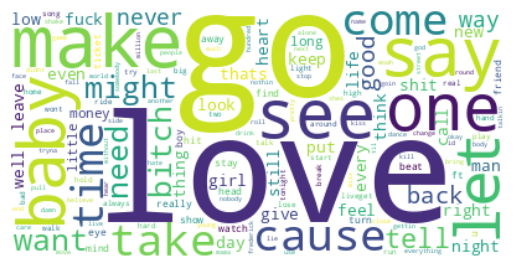

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#summer
wordcloud = WordCloud(collocations = False,
                      background_color = 'white').generate(' '.join(df_summer_en['text_lemmatized']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Winter**

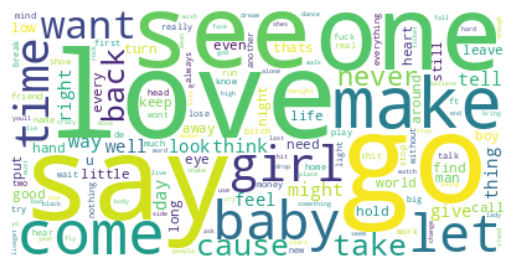

In [ ]:
wordcloud = WordCloud(collocations = False,
                      background_color = 'white').generate(' '.join(df_winter_en['text_lemmatized']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Saving Data as CSV**

In [ ]:
# Save summer+winter to a CSV file
df_summer_en.to_csv('final_summer.csv', index=False)
df_winter_en.to_csv('final_winter.csv', index=False)